## Problem set

You will analyze a dataset representing payments between agents. Each row represents a payment with the following columns:

- **Sourceid:** ID of the agent initiating the payment.
- **Targetid:** ID of the recipient agent.
- **Weights:** The amount of money transferred (payment amount).

## **1. Preprocessing**

- Load the dataset into a pandas DataFrame and inspect the first few rows. Rename columns to source, target, and weight for consistency.
- Only keep edges where the weight is greater than or equal to 1000. This helps focus on significant payments.
- Using `NetworkX`, create a directed graph from the filtered data. Each row should represent an edge from source to target with a weight.
- Create an initial visualization of the full graph with spring_layout, where node sizes are proportional to their degree centrality. Set edge thickness proportional to the weight.


*Q1: Based on the visualization, do you observe any highly connected nodes? How would you interpret these nodes in the context of payment flows?*

*Q2: Are there any isolated clusters or communities that stand out visually? What might these clusters represent in real-world terms?*

   source  target   weight
0       0       1   4440.0
1       0       2   3809.0
2       0       3  16011.0
3       0       4  16674.0
4       0       5   2779.0
       source  target   weight
0           0       1   4440.0
1           0       2   3809.0
2           0       3  16011.0
3           0       4  16674.0
4           0       5   2779.0
...       ...     ...      ...
11621    4547    2937   9295.0
11623    4547    3091   3147.0
11625    4547    3428   2000.0
11626    4547    3459  21293.0
11629    4547    4073   1001.0

[10303 rows x 3 columns]


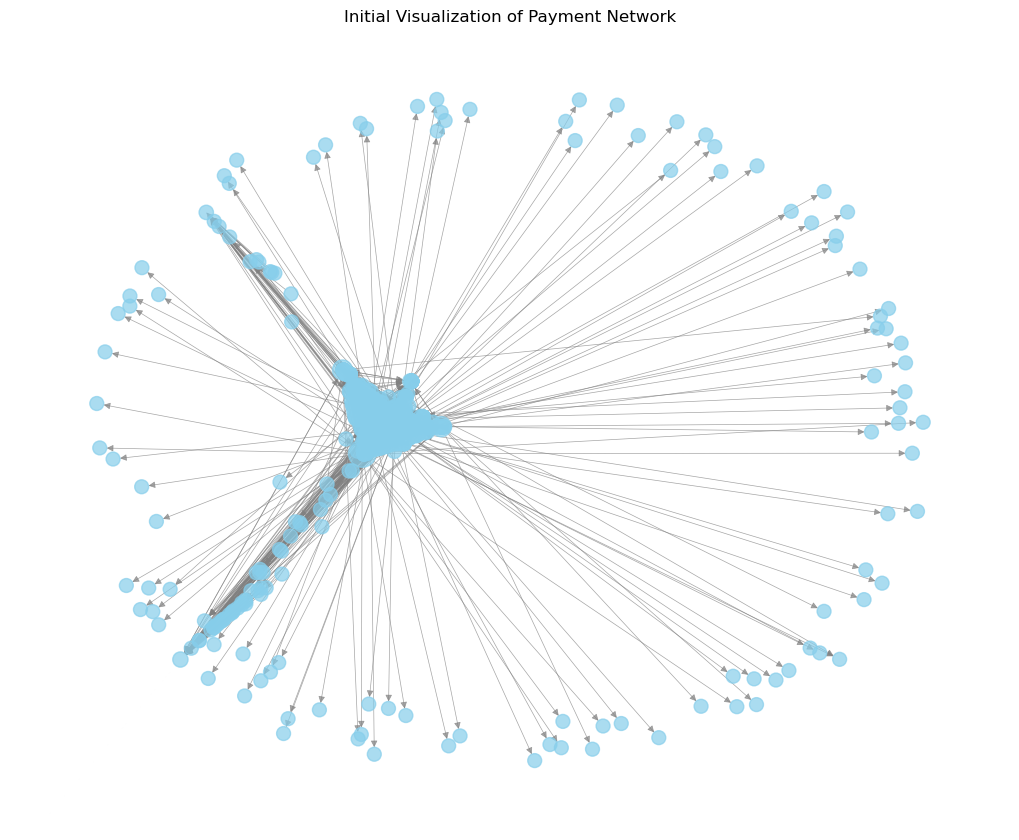

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('payments_dataset.csv', delimiter=';')

df.columns = df.columns.str.strip()
df.rename(columns={'Sourceid': 'source', 'Targetid': 'target', 'Weights': 'weight'}, inplace=True)
print(df.head())

df = df[df['weight'] >= 1000]
print(df)

G = nx.DiGraph()
G.add_weighted_edges_from(df[['source', 'target', 'weight']].values)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, node_size=[100 + 1000 * nx.degree_centrality(G)[n] for n in G], 
        edge_color='gray', width=[0.5 + 2 * d['weight']/max(df['weight']) for u, v, d in G.edges(data=True)],
        with_labels=False, node_color='skyblue', alpha=0.7)
plt.title("Initial Visualization of Payment Network")
plt.show()

## **2. Basic Analysis**

Compute the following properties of the graph:
- Number of nodes
- Number of edges
- Average degree 
- Create a histogram of node degrees (number of edges connected to each node). First calculate the degree (in-degree + out-degree) for each node, then plot the histogram.
- Calculate the density of the graph.
- Calculate the reciprocity, which measures the proportion of edges that are bidirectional (if an edge exists from node A to node B, does one also exist from B to A?). Hint: Use `nx.reciprocity()` for directed graphs.
- Find nodes that have no incoming edges (in-degree = 0) and those with no outgoing edges (out-degree = 0). Print their IDs and counts.

*Q3: What does the average degree tell you about the structure of the network?*

*Q4: If a node has a high degree, what might that indicate about its role in this payment network?*

*Q5: How might having a few high-degree nodes affect the network's resilience? Would the network be more vulnerable if these high-degree nodes were removed?*

*Q6: Is there a high level of reciprocity? How does this relate to the nature of payment flows between nodes?*

*Q7: If many nodes have no incoming or outgoing edges, what might that suggest about the connectivity of the network?*

Number of nodes: 4243
Number of edges: 10303
Average degree: 2.4282347395710584


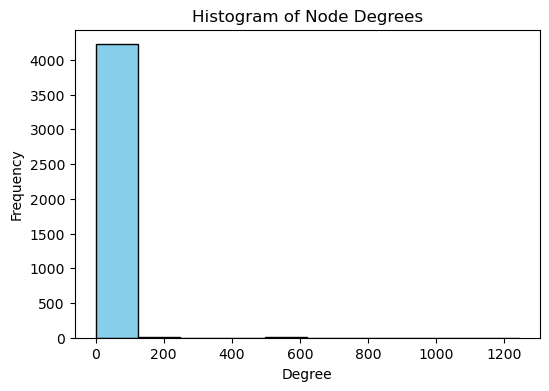

Density of the graph: 0.0005724268598705937
Reciprocity of the graph: 0.14015335339221585
Count of nodes with no incoming edges: 3089
Count of nodes with no outgoing edges: 106


In [20]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = num_edges / num_nodes

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree}")

# histogram
degrees = [deg for _, deg in G.degree()]
plt.figure(figsize=(6, 4))
plt.hist(degrees, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Histogram of Node Degrees')
plt.show()

# density
density = nx.density(G)
print(f"Density of the graph: {density}")

# reciprocity
reciprocity = nx.reciprocity(G)
print(f"Reciprocity of the graph: {reciprocity}")

# no in- out-
no_incoming = [node for node in G.nodes if G.in_degree(node) == 0]
no_outgoing = [node for node in G.nodes if G.out_degree(node) == 0]

print(f"Count of nodes with no incoming edges: {len(no_incoming)}")
print(f"Count of nodes with no outgoing edges: {len(no_outgoing)}")

## 3. Weighted Analysis

- Calculate the in-strength and out-strength of each node, and find the top 8 nodes with the highest total strength
- Calculate the average in-strength and average out-strength of the nodes.
- Calculate the standard deviation of the edge weights. A higher standard deviation indicates more variability in payment amounts. Comment on whether the payments are relatively uniform or highly variable.
- Select the top 10 nodes by out-strength and visualize them as a subgraph. Color these nodes differently and show the edge weights.

*Q8: Nodes with high in-strength or out-strength represent significant "payment hubs" or "payment distributors." Can you identify these nodes? What real-world roles might they play?*

Top 8 nodes by total strength: [(0.0, 341240571.23096794), (4547.0, 246131338.89006302), (5.0, 207905240.60187095), (17.0, 169594421.02847004), (6.0, 148151943.737947), (4.0, 147665662.56326798), (2.0, 144216823.908849), (8.0, 132960659.041529)]
Average in-strength: 426277.93115615525
Average out-strength: 426277.9311561553
Standard deviation of edge weights: 1668397.7113857793
Payments are highly variable.


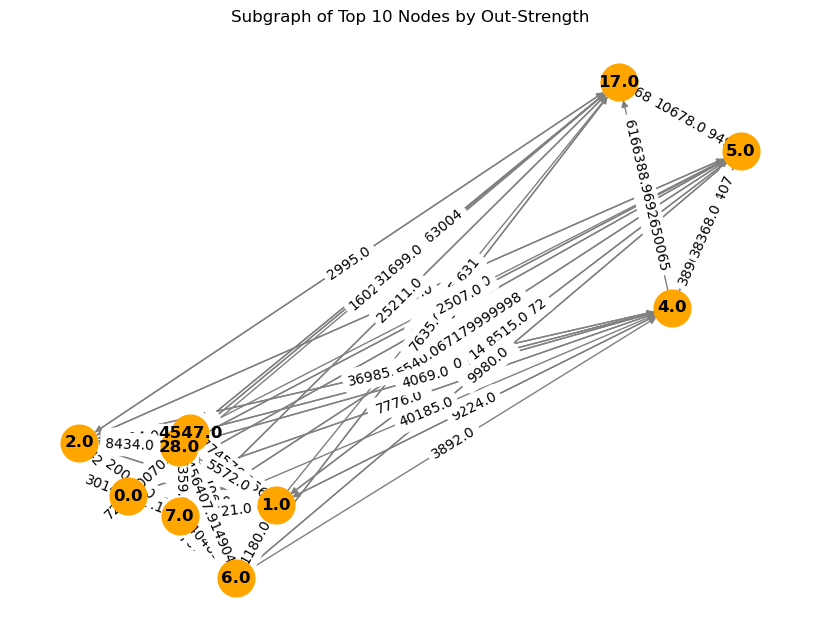

In [22]:
# in and out strength top 8
in_strength = {node: G.in_degree(node, weight='weight') for node in G.nodes()}
out_strength = {node: G.out_degree(node, weight='weight') for node in G.nodes()}
total_strength = {node: in_strength[node] + out_strength[node] for node in G.nodes()}

top_8_strength = sorted(total_strength.items(), key=lambda x: x[1], reverse=True)[:8]
print("Top 8 nodes by total strength:", top_8_strength)

# avarage in and out strength
avg_in_strength = np.mean(list(in_strength.values()))
avg_out_strength = np.mean(list(out_strength.values()))

print(f"Average in-strength: {avg_in_strength}")
print(f"Average out-strength: {avg_out_strength}")

# standard deviation
weight_std_dev = df['weight'].std()
print(f"Standard deviation of edge weights: {weight_std_dev}")

if weight_std_dev > df['weight'].mean():
    print("Payments are highly variable.")
else:
    print("Payments are relatively uniform.")

# top 10 nodes out-strength
top_10_out = sorted(out_strength.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_nodes = [node for node, _ in top_10_out]
subgraph = G.subgraph(top_10_nodes)

pos = nx.spring_layout(subgraph)
plt.figure(figsize=(8, 6))
nx.draw(subgraph, pos, with_labels=True, node_color='orange', node_size=700, edge_color='gray', font_weight='bold')
edge_labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)
plt.title("Subgraph of Top 10 Nodes by Out-Strength")
plt.show()


## 4. Centrality Measures

**Alternative Centrality Measures**

Calculate the following centrality measures and list the top 5 nodes for each:
- *Degree centrality*
- *Closeness Centrality*
- *Eigenvector Centrality*: shows nodes that are connected to other important nodes.
- *Load Centrality*: Measures the fraction of all shortest paths passing through a node, emphasizing the node’s role in connecting different parts of the network.

Create a scatter plot comparing degree centrality and eigenvector centrality for each node.
Highlight the top 5 nodes for each centrality measure and label them.

*Q9: Which centrality measure do you think best reflects the "influence" of a node in a payment network? Why?*

*Q10: How does the correlation between degree centrality and eigenvector centrality help you understand the network's structure?*

In [23]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
load_centrality = nx.load_centrality(G)

top_5_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_load = sorted(load_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 by Degree Centrality:", top_5_degree)
print("Top 5 by Closeness Centrality:", top_5_closeness)
print("Top 5 by Eigenvector Centrality:", top_5_eigenvector)
print("Top 5 by Load Centrality:", top_5_load)

Top 5 by Degree Centrality: [(0.0, 0.2927864214992928), (8.0, 0.1885902876001886), (17.0, 0.1848184818481848), (4547.0, 0.14285714285714285), (6.0, 0.14144271570014144)]
Top 5 by Closeness Centrality: [(0.0, 0.5176010211858625), (4547.0, 0.48314477178724247), (8.0, 0.4808583203736152), (3.0, 0.4780737626009124), (2.0, 0.4750933243254961)]
Top 5 by Eigenvector Centrality: [(0.0, 0.21819153554982326), (17.0, 0.20128193274517905), (4547.0, 0.19747698103328284), (8.0, 0.18946179339723365), (6.0, 0.18797000353623358)]
Top 5 by Load Centrality: [(0.0, 0.08197213283976615), (17.0, 0.043855567430209005), (2.0, 0.042420294803678045), (8.0, 0.04229906449172407), (6.0, 0.03396755011671321)]


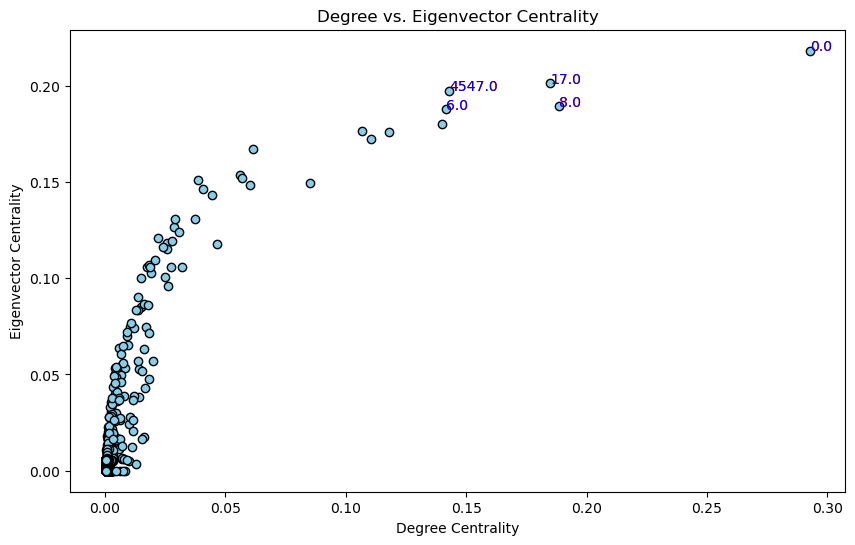

In [24]:
import matplotlib.pyplot as plt
degree_vals = list(degree_centrality.values())
eigenvector_vals = list(eigenvector_centrality.values())

plt.figure(figsize=(10, 6))
plt.scatter(degree_vals, eigenvector_vals, color='skyblue', edgecolor='black')
plt.xlabel("Degree Centrality")
plt.ylabel("Eigenvector Centrality")
plt.title("Degree vs. Eigenvector Centrality")

# Highlight and label top 5 nodes in both metrics
for node, centrality in top_5_degree:
    plt.annotate(node, (degree_centrality[node], eigenvector_centrality[node]), color='red')
for node, centrality in top_5_eigenvector:
    plt.annotate(node, (degree_centrality[node], eigenvector_centrality[node]), color='blue')

plt.show()

## 5. Community and Core-Periphery Structure

- Convert the directed graph to an undirected graph and apply the Louvain method for community detection. List the number of communities detected and the size of each.

Hint: You can use `community_louvain.best_partition()` from the `python-louvain` package.

- Find the k-core of the network for k=2 and determine the core and periphery nodes.
- Calculate the average clustering coefficient for the core nodes and compare it with that of the periphery nodes.
- Find the node with the maximum clustering coefficient.

Hint: Use `nx.k_core()` and `nx.clustering()`.

In [ ]:
pip install python-louvain

In [36]:
from community import community_louvain

G_undirected = G.to_undirected()
partition = community_louvain.best_partition(G_undirected)
num_communities = len(set(partition.values()))
community_sizes = {community: list(partition.values()).count(community) for community in set(partition.values())}

print(f"Number of communities: {num_communities}")
print("Sizes of each community:", community_sizes)

Number of communities: 10
Sizes of each community: {0: 1202, 1: 267, 2: 372, 3: 444, 4: 364, 5: 520, 6: 305, 7: 254, 8: 97, 9: 418}


In [33]:
k_core = nx.k_core(G, k=2)
core_nodes = set(k_core.nodes())
periphery_nodes = set(G.nodes()) - core_nodes

core_clustering = np.mean([nx.clustering(G, node) for node in core_nodes])
periphery_clustering = np.mean([nx.clustering(G, node) for node in periphery_nodes])

print(f"Core Nodes clustering coefficient (average): {core_clustering}")
print(f"Periphery nodes clustering coefficient (average): {periphery_clustering}")

clustering_coefficients = nx.clustering(G)
max_clustering_node = max(clustering_coefficients, key=clustering_coefficients.get)
max_clustering_value = clustering_coefficients[max_clustering_node]

print(f"Node with maximum clustering coefficient: {int(max_clustering_node)} (value: {max_clustering_value})")


Core Nodes clustering coefficient (average): 0.7536314883581225
Periphery nodes clustering coefficient (average): 0.0
Node with maximum clustering coefficient: 42 (value: 1.0)


## 6. Bonus Questions 

**Analyze Network Robustness**

- Remove the top 5 nodes by betweenness centrality and analyze how the graph’s structure changes.
- Calculate the new number of nodes and edges, as well as the network density, after these nodes are removed.
- look at the size of the new SCC and compare it with the old one.

*Q11: After removing the top 5 nodes by betweenness centrality, how has the network changed in terms of node count, edge count, and density?*

*Q12: How did the SCC changed? What is your interpretation?*

In [4]:
betweenness_centrality = nx.betweenness_centrality(G)
top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
nodes_to_remove = [node for node, _ in top_5_betweenness]

original_sccs = list(nx.strongly_connected_components(G))
original_num_scc = len(original_sccs)
original_largest_scc = len(max(original_sccs, key=len))

print("Original Graph:")
print(f"Number of strongly connected components: {original_num_scc}")
print(f"Size of the largest strongly connected component: {original_largest_scc}")

# Remove the top 5 nodes by betweenness centrality
G_removed = G.copy()
G_removed.remove_nodes_from(nodes_to_remove)

# Analyze the modified directed graph
new_nodes = G_removed.number_of_nodes()
new_edges = G_removed.number_of_edges()
new_density = nx.density(G_removed)

# Calculate SCCs for the modified graph
new_sccs = list(nx.strongly_connected_components(G_removed))
new_num_scc = len(new_sccs)
new_largest_scc = len(max(new_sccs, key=len))

print("\nAfter removing top 5 nodes by betweenness centrality:")
print(f"New number of nodes: {new_nodes}")
print(f"New number of edges: {new_edges}")
print(f"New network density: {new_density:.4f}")
print(f"Number of strongly connected components after removal: {new_num_scc}")
print(f"Size of the largest strongly connected component after removal: {new_largest_scc}")

Original Graph:
Number of strongly connected components: 3211
Size of the largest strongly connected component: 1033

After removing top 5 nodes by betweenness centrality:
New number of nodes: 4238
New number of edges: 6301
New network density: 0.0004
Number of strongly connected components after removal: 3858
Size of the largest strongly connected component after removal: 381
